# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import requests
import time

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

np.random.seed(42)

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# cities

In [4]:
# Create base url to scan API
url = "http://api.openweathermap.org/data/2.5/weather?&units=imperial"
base_url = f"{url}&appid={weather_api_key}"

In [5]:
# Create parameters
# cities = cities[0:10]
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

In [6]:
# Create a for loop to go through each city. 
# Include a try/except so code doesn't break.
counter = 0

for city in cities:
    my_city_url = base_url + '&q=' + city
#     print(city)
#     counter += 1
#     if counter == 10:
#         break

    try:
        response = requests.get(my_city_url).json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        time.sleep(0.5)
        
    except (KeyError, ValueError):
        # Append null values
#         print("Missing field...skipping.")
        pass
    
print(response)

{'coord': {'lon': 133.385, 'lat': 67.5447}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -20.47, 'feels_like': -28.08, 'temp_min': -20.47, 'temp_max': -20.47, 'pressure': 1032, 'humidity': 80, 'sea_level': 1032, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 1.19, 'deg': 108}, 'clouds': {'all': 0}, 'dt': 1613446125, 'sys': {'country': 'RU', 'sunrise': 1613431123, 'sunset': 1613460159}, 'timezone': 36000, 'id': 2013465, 'name': 'Verkhoyansk', 'cod': 200}


In [7]:
# Create a dataframe from the cities, lat, temp, humidity, cloudiness, and wind speed.
city_weather_df = pd.DataFrame({"City": city_name,
                                "City Latitude": lat,
                                "City Longitude": lng,
                                "Max Temperature": max_temp,
                                "Humidity": humidity,
                                "Cloud Coverage": cloudiness,
                                "Wind Speed": wind_speed,
                                "City Country": country,
                                "City Datetime": date
                               })


city_weather_df

,City,City Latitude,City Longitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,City Country,City Datetime
0,Henties Bay,-22.1160,14.2845,60.01,87,60,8.19,NA,1613445822
1,Bethel,41.3712,-73.4140,30.99,93,90,5.75,US,1613445823
2,Saint-François,46.4154,3.9054,37.00,87,0,2.30,FR,1613445823
3,Ushuaia,-54.8000,-68.3000,55.40,58,75,2.30,AR,1613445662
4,Mar del Plata,-38.0023,-57.5575,69.01,100,90,5.75,AR,1613445721
...,...,...,...,...,...,...,...,...,...
539,Vredendal,-31.6683,18.5012,58.14,60,0,9.26,ZA,1613446374
540,Kushima,31.4583,131.2333,55.40,46,20,18.41,JP,1613446375
541,Eirunepé,-6.6603,-69.8736,74.10,96,100,2.37,BR,1613446376
542,Tocopilla,-22.0920,-70.1979,67.50,67,0,4.18,CL,1613446224


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Export the city data into a .csv
city_weather_df.to_csv("City_Weather.csv", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

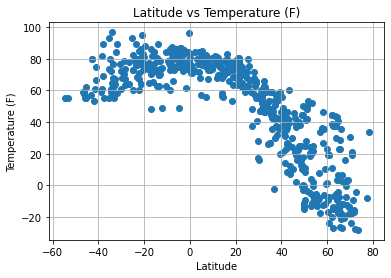

In [9]:
# Build a scatter plot for Latitude vs Temperature (F)
plt.scatter(city_weather_df["City Latitude"], city_weather_df["Max Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Temperature (F)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_vs_TemperatureInWorldCities")

plt.show()

The "Latitude vs Temperature" scatter plot compares the latitude with the temperature of hundreds of cities around the world.

## Latitude vs. Humidity Plot

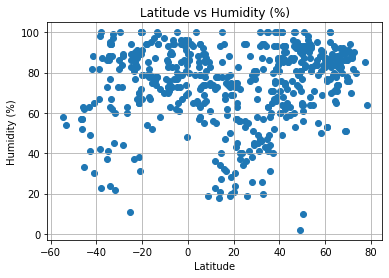

In [10]:
# Build a scatter plot for Latitude vs Humidity 
plt.scatter(city_weather_df["City Latitude"], city_weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_vs_HumidityInWorldCities")

plt.show()

The "Latitude vs Humidity" scatter plot compares the latitude with the humidity of hundreds of cities around the world.

## Latitude vs. Cloudiness Plot

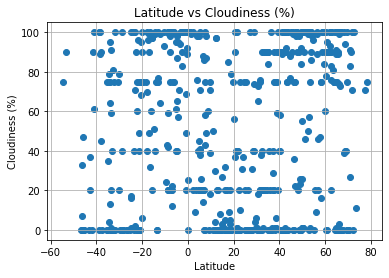

In [11]:
# Build a scatter plot for Latitude vs Cloudiness
plt.scatter(city_weather_df["City Latitude"], city_weather_df["Cloud Coverage"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_vs_CloudinessInWorldCities")

plt.show()

The "Latitude vs Cloudiness" scatter plot compares the latitude with the cloudiness in hundreds of cities around the world.

## Latitude vs. Wind Speed Plot

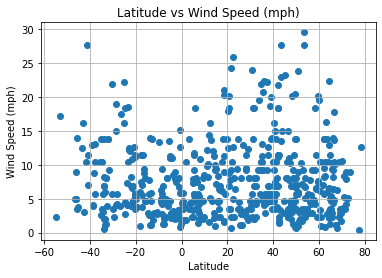

In [12]:
# Build a scatter plot for Latitude vs Wind Speed (mph)
plt.scatter(city_weather_df["City Latitude"], city_weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed (mph)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_vs_Wind_SpeedInWorldCities")

plt.show()

The "Latitude vs Wind Speed" scatter plot compares the latitude with the wind speed in hundreds of cities around the world.

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
city_weather_df["Humidity"].max()

100

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_weather_df.dropna(inplace=True)
city_weather_df.reset_index(drop=True, inplace=True)
city_weather_df

,City,City Latitude,City Longitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,City Country,City Datetime
0,Henties Bay,-22.1160,14.2845,60.01,87,60,8.19,NA,1613445822
1,Bethel,41.3712,-73.4140,30.99,93,90,5.75,US,1613445823
2,Saint-François,46.4154,3.9054,37.00,87,0,2.30,FR,1613445823
3,Ushuaia,-54.8000,-68.3000,55.40,58,75,2.30,AR,1613445662
4,Mar del Plata,-38.0023,-57.5575,69.01,100,90,5.75,AR,1613445721
...,...,...,...,...,...,...,...,...,...
539,Vredendal,-31.6683,18.5012,58.14,60,0,9.26,ZA,1613446374
540,Kushima,31.4583,131.2333,55.40,46,20,18.41,JP,1613446375
541,Eirunepé,-6.6603,-69.8736,74.10,96,100,2.37,BR,1613446376
542,Tocopilla,-22.0920,-70.1979,67.50,67,0,4.18,CL,1613446224


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
# Find Northern Hemisphere cities with a latitude greater than '0'
northern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] > 0)]

# Define variables
north_latitude = northern_lats["City Latitude"]
north_max_temp = northern_lats["Max Temperature"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_latitude, north_max_temp)

# Get regression values
regress_values_north = north_latitude * slope + intercept
print(regress_values_north)


1      34.341280
2      27.362333
6       1.009552
7      35.846453
8      32.641024
         ...    
535    16.914666
536    23.209443
538    82.057314
540    48.056359
543    -1.871294
Name: City Latitude, Length: 374, dtype: float64


In [16]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -1.38x +91.58


The r-value is 0.7551799190770769


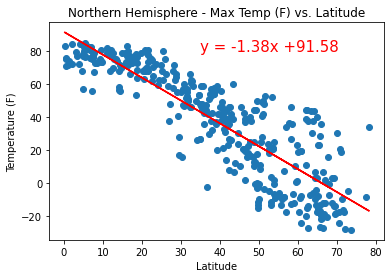

In [17]:
# Create plot
plt.scatter(north_latitude, north_max_temp)
plt.plot(north_latitude,regress_values_north, "r-")

#Label plot and annotate the line equation
plt.title("Northern Hemisphere - Max Temp (F) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq,(35, 80),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [18]:
# Find Southern Hemisphere cities with a latitude less than '0'
southern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] < 0)]

# Define variables
south_latitude = southern_lats["City Latitude"]
south_max_temp = southern_lats["Max Temperature"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_latitude, south_max_temp)

# Get regression values
regress_values_south = south_latitude * slope + intercept
print(regress_values_south)

0      73.038001
3      61.529766
4      67.444338
5      68.852410
11     73.360530
         ...    
534    70.881703
537    75.936784
539    69.674578
541    78.480047
542    73.046451
Name: City Latitude, Length: 170, dtype: float64


In [19]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.35x +80.83


The r-value is 0.20549597977718953


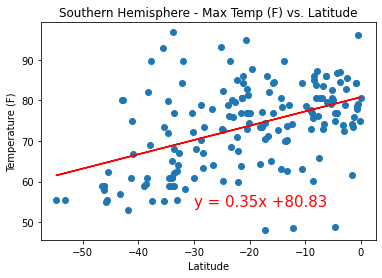

In [20]:
# Create plot
plt.scatter(south_latitude, south_max_temp)
plt.plot(south_latitude,regress_values_south, "r-")

#Label plot and annotate the line equation
plt.title("Southern Hemisphere - Max Temp (F) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq,(-30, 54),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [21]:
# Find Northern Hemisphere cities with a latitude greater than '0'
northern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] > 0)]

# Define variables
north_latitude = northern_lats["City Latitude"]
north_humidity = northern_lats["Humidity"]

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_latitude, north_humidity)

# Get regression values
regress_values_north = north_latitude * slope + intercept
print(regress_values_north)

1      74.143550
2      75.651109
6      81.343712
7      73.818410
8      74.510831
         ...    
535    77.907965
536    76.548197
538    63.836159
540    71.180884
543    81.966019
Name: City Latitude, Length: 374, dtype: float64


In [22]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.3x +61.78


The r-value is 0.09473089251968764


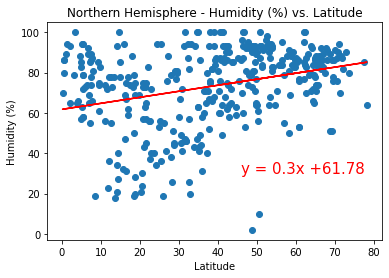

In [23]:
# Create plot
plt.scatter(north_latitude, north_humidity)
plt.plot(north_latitude,regress_values_north, "r-")

#Label plot and annotate the line equation
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(46, 30),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [24]:
# Find Southern Hemisphere cities with a latitude less than '0'
southern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] < 0)]

# Define variables
south_latitude = southern_lats["City Latitude"]
south_humidity = southern_lats["Humidity"]

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_latitude, south_humidity)

# Get regression values
regress_values_south = south_latitude * slope + intercept
print(regress_values_south)

0      75.303990
3      60.504952
4      68.110808
5      69.921522
11     75.718747
         ...    
534    72.531095
537    79.031687
539    70.978790
541    82.302200
542    75.314857
Name: City Latitude, Length: 170, dtype: float64


In [25]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.45x +85.32


The r-value is 0.10948163044082607


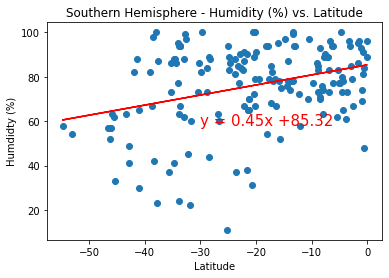

In [26]:
# Create plot
plt.scatter(south_latitude, south_humidity)
plt.plot(south_latitude,regress_values_south, "r-")

#Label plot and annotate the line equation
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humdidty (%)')
plt.annotate(line_eq,(-30, 58),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [27]:
# Find Northern Hemisphere cities with a latitude greater than '0'
northern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] > 0)]

# Define variables
north_latitude = northern_lats["City Latitude"]
north_cloudiness = northern_lats["Cloud Coverage"]

# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_latitude, north_cloudiness)

# Get regression values
regress_values_north = north_latitude * slope + intercept
print(regress_values_north)

1      50.512086
2      52.748708
6      61.194282
7      50.029706
8      51.056986
         ...    
535    56.096990
536    54.079631
538    35.219988
540    46.116659
543    62.117539
Name: City Latitude, Length: 374, dtype: float64


In [28]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.44x +32.17


The r-value is 0.049194607871426585


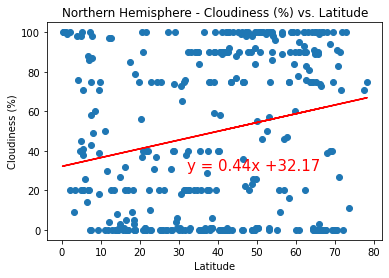

In [29]:
# Create plot
plt.scatter(north_latitude, north_cloudiness)
plt.plot(north_latitude,regress_values_north, "r-")

#Label plot and annotate the line equation
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(32, 30),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [30]:
# Find Southern Hemisphere cities with a latitude less than '0'
southern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] < 0)]

# Define variables
south_latitude = southern_lats["City Latitude"]
south_cloudiness = southern_lats["Cloud Coverage"]

# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_latitude, south_cloudiness)

# Get regression values
regress_values_south = south_latitude * slope + intercept
print(regress_values_south)

0      54.722340
3      23.842004
4      39.712724
5      43.491040
11     55.587791
         ...    
534    48.936293
537    62.500720
539    45.697183
541    69.325119
542    54.745016
Name: City Latitude, Length: 170, dtype: float64


In [31]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.94x +75.62


The r-value is 0.11131474443647209


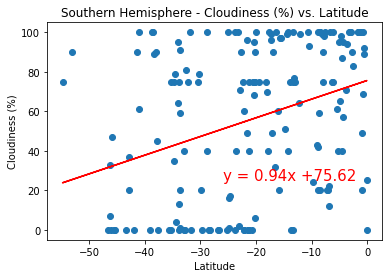

In [32]:
# Create plot
plt.scatter(south_latitude, south_cloudiness)
plt.plot(south_latitude,regress_values_south, "r-")

#Label plot and annotate the line equation
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-26, 25),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [33]:
# Find Northern Hemisphere cities with a latitude greater than '0'
northern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] > 0)]

# Define variables
north_latitude = northern_lats["City Latitude"]
north_wind_speed = northern_lats["Wind Speed"]

# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_latitude, north_wind_speed)

# Get regression values
regress_values_north = north_latitude * slope + intercept
print(regress_values_north)

1      7.855454
2      7.867387
6      7.912448
7      7.852880
8      7.858361
         ...   
535    7.885252
536    7.874488
538    7.773864
540    7.832002
543    7.917374
Name: City Latitude, Length: 374, dtype: float64


In [34]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.0x +7.76


The r-value is 7.262821861497288e-05


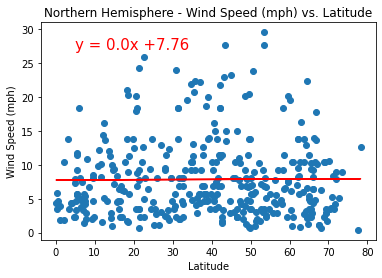

In [35]:
# Create plot
plt.scatter(north_latitude, north_wind_speed)
plt.plot(north_latitude,regress_values_north, "r-")

#Label plot and annotate the line equation
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(5, 27),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [36]:
# Find Southern Hemisphere cities with a latitude less than '0'
southern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] < 0)]

# Define variables
south_latitude = southern_lats["City Latitude"]
south_wind_speed = southern_lats["Wind Speed"]

# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_latitude, south_wind_speed)

# Get regression values
regress_values_south = south_latitude * slope + intercept
print(regress_values_south)

0       7.223953
3      10.009063
4       8.577676
5       8.236908
11      7.145898
         ...    
534     7.745799
537     6.522418
539     8.037936
541     5.906923
542     7.221908
Name: City Latitude, Length: 170, dtype: float64


In [37]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.09x +5.34


The r-value is 0.056215355227629445


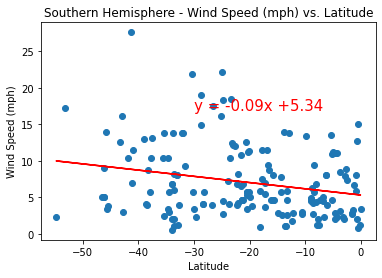

In [38]:
# Create plot
plt.scatter(south_latitude, south_wind_speed)
plt.plot(south_latitude,regress_values_south, "r-")

#Label plot and annotate the line equation
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(-30, 17),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()